## Notebook Purpose
This notebook is used to plot high-resolution zoomed-in SMB maps over a section of Khumbu Glacier (Figure 6 C).

#### Last updated: May 23, 2023

## TODO:
- Update imports when new library has been built up with all updates
-Generalise path to data products during revisions, after the data distribution plan is finalized

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'


In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter,velocity_timeseries
import warnings
warnings.filterwarnings('ignore')

In [10]:
%matplotlib inline


In [3]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu


In [6]:

euldz_fn = 'SMB_data/khumbu_farinotti_2015-11-02_to_2016-10-25_eulerian_dhdt.tif'
lagdz_fn = 'SMB_data/khumbu_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif'
downslope_dz_fn = 'SMB_data/khumbu_farinotti_2015-11-02_to_2016-10-25_downslope_dhdt.tif'
smb_fn = 'SMB_data/khumbu_farinotti_2015-11-02_to_2016-10-25_smb_dhdt.tif'
dem1_fn = 'dem/20151102_0517_10400100125E8E00_10400100130D8500_align.tif'
ortho_img1 = 'orthoimage/aligned_images/20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif'
ortho_img2 = 'orthoimage/aligned_images/20161025_104001002469AD00_ortho_res_0.34m__shifted_to__20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs_flow_corrected.tif'
#ortho_img1_2m = '20151002_10200100457F0C00_ortho_proc/20151002_10200100457F0C00_ortho_res_2.0m.tif'
#ortho_img2_2m = '20161029_103001005E3EFF00_ortho_proc/20161029_103001005E3EFF00_ortho_res_2.0m.tif'
#ortho_img1_2m = ortho_img1
#ortho_img2_2m = ortho_img2

In [4]:
low_res_extent = [482485.41968629614, 3092089.9532137522, 482775.91968629614, 3092380.4532137522]
ds_extent = low_res_extent
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]

In [7]:
#ds_list_ortho_cliff2 = warplib.memwarp_multi_fn(['20151002_10200100457F0C00_ortho_proc/20151002_10200100457F0C00_ortho_res_0.51m_upper_area_clip_zoom_trim.tif',
#                                                 '20161029_103001005E3EFF00_ortho_proc/20161029_103001005E3EFF00_ortho_res_0.53m_upper_area_clip_shifted_zoom_trim.tif'])
ds_list_ortho_cliff2 = warplib.memwarp_multi_fn([ortho_img1,
                                                 ortho_img2],extent=low_res_extent)
cliff2_t1,cliff2_t2 = [iolib.ds_getma(ds) for ds in ds_list_ortho_cliff2]
#low_res_extent = geolib.ds_extent(ds_list_ortho_cliff2[0])
low_res_ds_list = warplib.memwarp_multi_fn([euldz_fn,lagdz_fn,downslope_dz_fn,smb_fn,dem1_fn],extent=low_res_extent)
euldz,lagdz,downslope_dz,smb,dem1 = [iolib.ds_getma(ds) for ds in low_res_ds_list]


Warping all inputs to the following:
Resolution: 0.3500000000349246
Extent: [482485.41968629614, 3092089.9532137522, 482775.91968629614, 3092380.4532137522]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 2: orthoimage/aligned_images/20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif
nl: 830 ns: 830 res: 0.350
0...10...20...30...40...50...60...70...80...90...2 of 2: orthoimage/aligned_images/20161025_104001002469AD00_ortho_res_0.34m__shifted_to__20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs_flow_corrected.tif
nl: 830 ns: 830 res: 0.350
100 - done.
0...10...20...30...40...50...60...70...80...90...
Warping all inputs to the following:
Resolution: 2.0
Extent: [482485.41968629614, 3092089.9532137522, 482775.91968629614, 3092380.4532137522]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg

In [8]:
ice_cliff_gpkg = gpd.read_file('SMB_data/khumbu_20240101.gpkg')

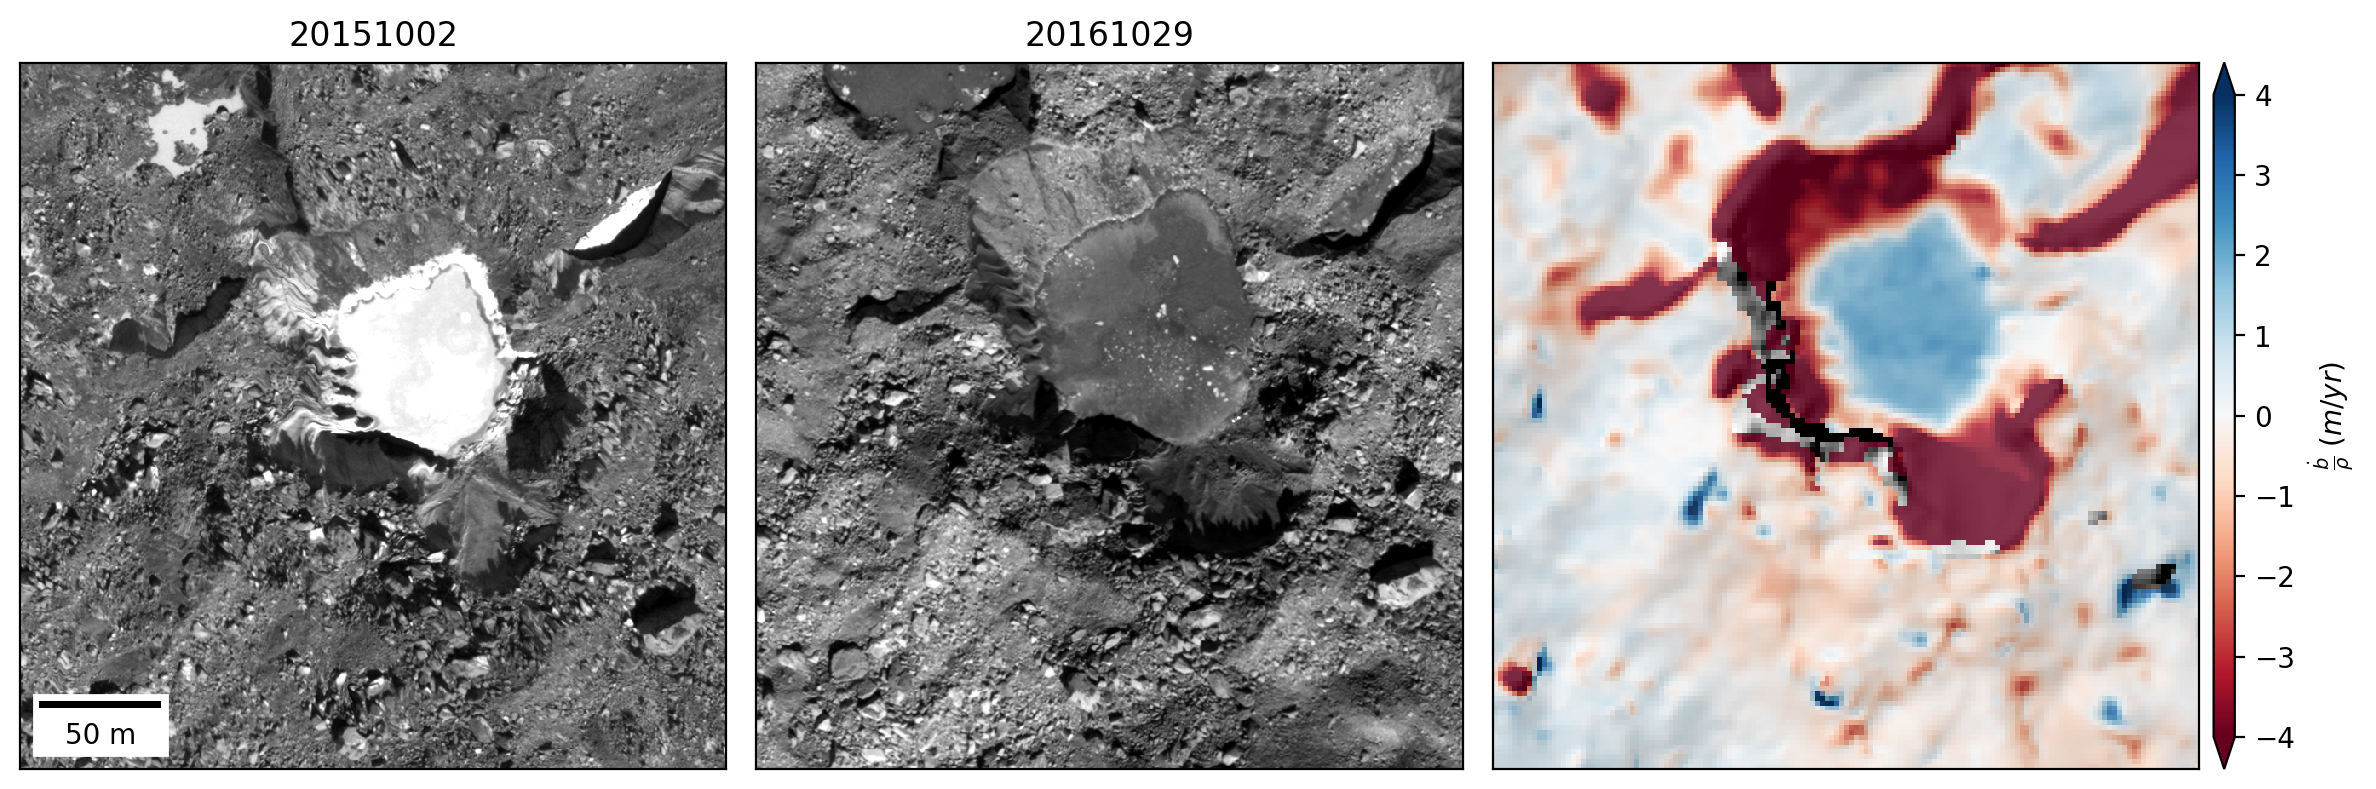

In [16]:
f,ax = plt.subplots(1,3,figsize=(12,8))
pltlib.iv(cliff2_t1,ax=ax[0],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20151002',
          clim=malib.calcperc(cliff2_t1,(0.01,97)))
pltlib.add_scalebar(ax=ax[0],res=geolib.get_res(ds_list[0])[0],location='lower left')
pltlib.iv(cliff2_t2,ax=ax[1],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20161029',
          clim=malib.calcperc(cliff2_t2,(1,99.9)))
pltlib.iv(smb,ds=low_res_ds_list[-1],hillshade=True,scalebar=False,full_bg_stretch=True,overlay_alpha=0.8,
          ax=ax[2],cmap='RdBu',clim=(-4,4),skinny=False,label=r'$\frac{\dot{b}}{\rho}\;(m/yr)$')
plt.tight_layout()
f.savefig('../../figures/khumbu_zoomin_3panel1_full_res_upper_area.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

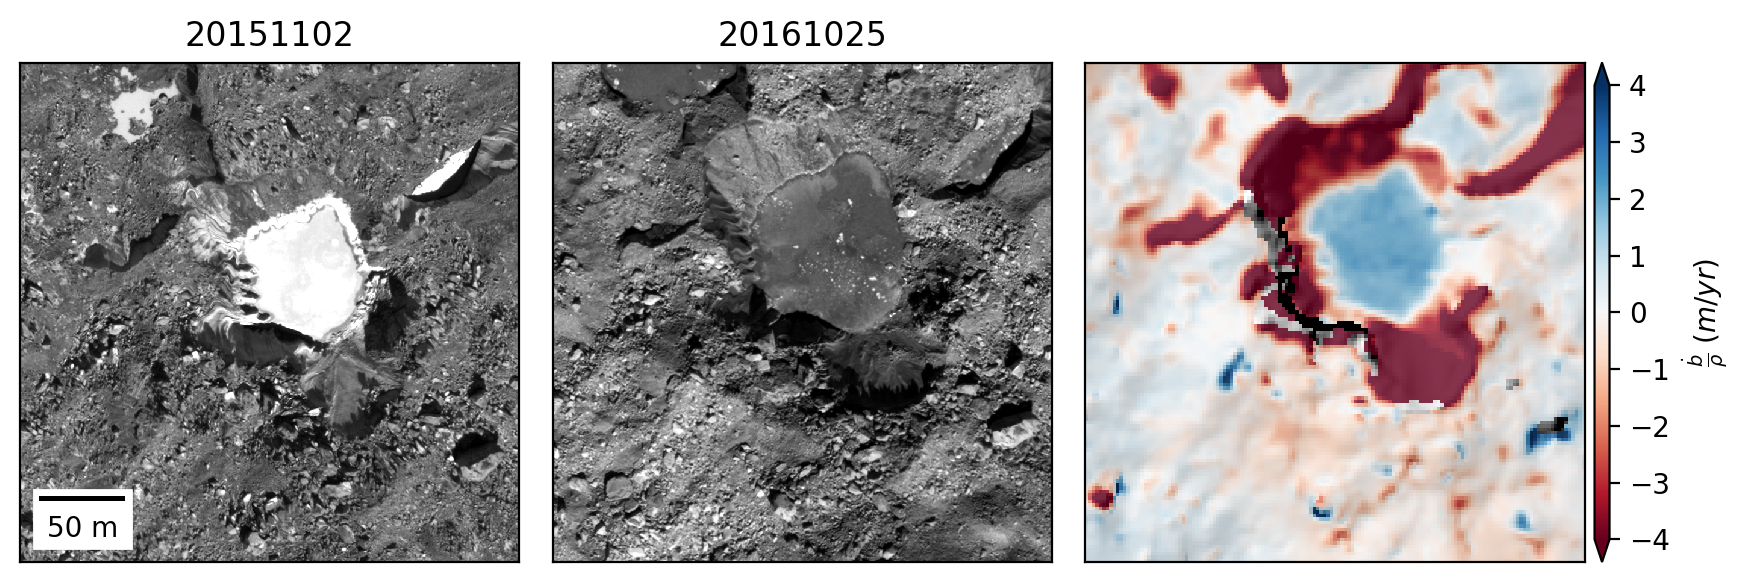

In [18]:
f,ax = plt.subplots(1,3,figsize=(9,3))
pltlib.iv(cliff2_t1,ax=ax[0],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20151102',
          clim=malib.calcperc(cliff2_t1,(0.01,97)))
pltlib.add_scalebar(ax=ax[0],res=geolib.get_res(ds_list[0])[0],location='lower left')
pltlib.iv(cliff2_t2,ax=ax[1],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20161025',
          clim=malib.calcperc(cliff2_t2,(1,99.9)))
pltlib.iv(smb,ds=low_res_ds_list[-1],hillshade=True,scalebar=False,full_bg_stretch=True,overlay_alpha=0.8,
          ax=ax[2],cmap='RdBu',clim=(-4,4),skinny=False,label=r'$\frac{\dot{b}}{\rho}\;(m/yr)$')
plt.tight_layout()
f.savefig('../../figures/khumbu_zoomin_3panel1_full_res_upper_area_small.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

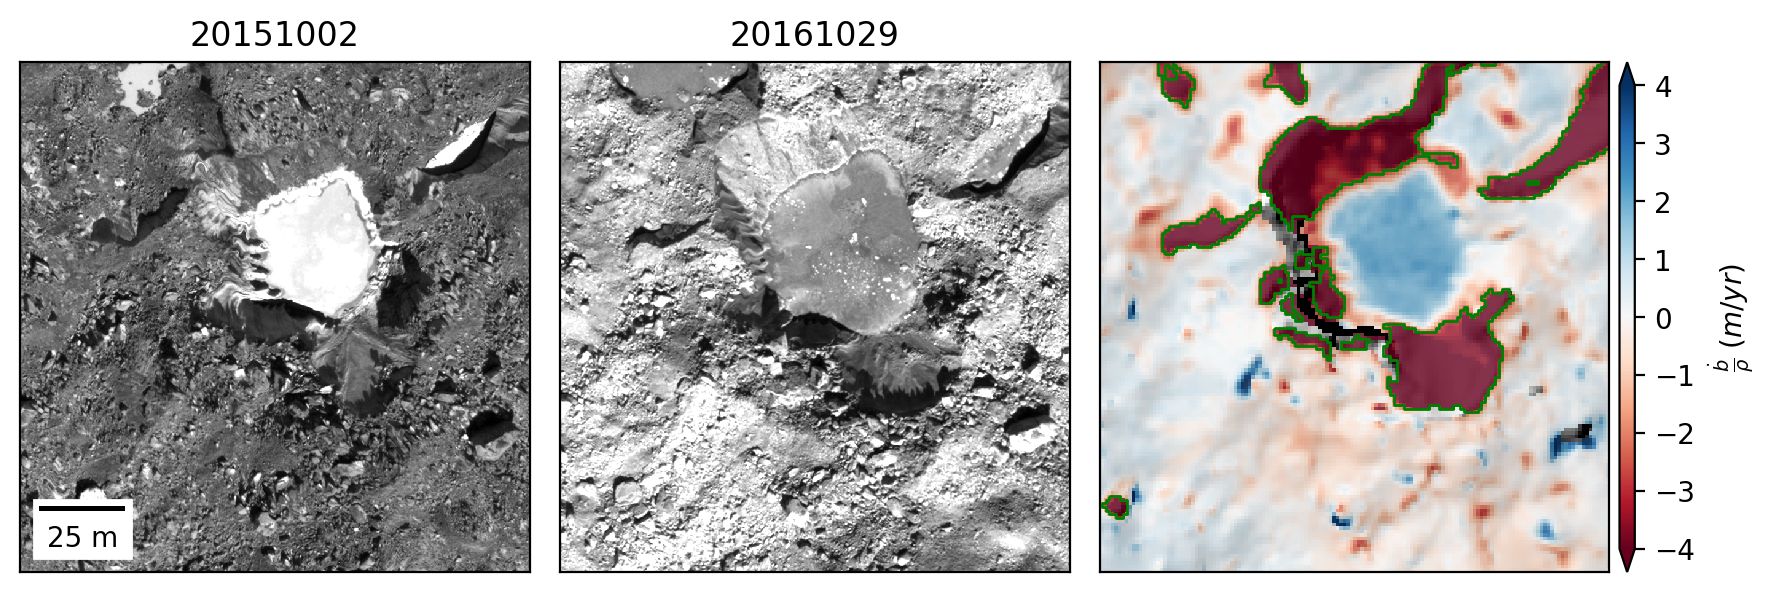

In [12]:
f,ax = plt.subplots(1,3,figsize=(9,4))
pltlib.iv(cliff2_t1,ax=ax[0],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20151002',
          clim=malib.calcperc(cliff2_t1,(0.01,97)),extent=fig_extent)
pltlib.add_scalebar(ax=ax[0],res=0.51,location='lower left')
pltlib.iv(cliff2_t2,ax=ax[1],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20161029',
          clim=malib.calcperc(cliff2_t2,(0.001,92)),extent=fig_extent)
pltlib.iv(smb,ds=low_res_ds_list[-1],hillshade=True,scalebar=False,full_bg_stretch=True,overlay_alpha=0.8,
          ax=ax[2],cmap='RdBu',clim=(-4,4),skinny=False,label=r'$\frac{\dot{b}}{\rho}\;(m/yr)$',extent=fig_extent)
ax[2].set_xlim(fig_extent[0],fig_extent[1])
ax[2].set_ylim(fig_extent[2],fig_extent[3])
ax[0].set_xlim(fig_extent[0],fig_extent[1])
ax[0].set_ylim(fig_extent[2],fig_extent[3])
ice_cliff_gpkg.plot(ax=ax[2],facecolor='None',edgecolor='green',linewidth=1)
plt.tight_layout()
f.savefig('../../figures/khumbu_zoomin_3panel1_full_res_upper_area_small_with_cliffs.png',dpi=300,bbox_inches='tight',pad_inches=0.1)